In [2]:
import os
import cv2
import glob as gb
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
# Tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout , BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  
from tensorflow.keras.utils import normalize

# metrics
from sklearn.metrics import classification_report, confusion_matrix

# Open files of datasets

In [3]:
train_file = "/kaggle/input/tomato-village/Variant-a(Multiclass Classification)/train"

for folder in os.listdir(train_file):
    files_folder = os.path.join(train_file, folder)
    files = gb.glob(os.path.join(files_folder, "*.jpg"))
    print(f"For Training Data, Found {len(files)} in folder {folder}")

For Training Data, Found 654 in folder Magnesium Deficiency
For Training Data, Found 632 in folder Late_blight
For Training Data, Found 50 in folder Pottassium Deficiency
For Training Data, Found 347 in folder Early_blight
For Training Data, Found 361 in folder Spotted Wilt Virus
For Training Data, Found 151 in folder Healthy
For Training Data, Found 251 in folder Nitrogen Deficiency
For Training Data, Found 716 in folder Leaf Miner


In [4]:
test_file = r"/kaggle/input/tomato-village/Variant-a(Multiclass Classification)/test"

for folder in os.listdir(test_file):
    files_folder = os.path.join(test_file , folder)
    files = gb.glob(pathname=os.path.join(files_folder , "*.jpg"))
    print(f"For Testing Data, Found {len(files)} in Folder  {folder}")

For Testing Data, Found 95 in Folder  Magnesium Deficiency
For Testing Data, Found 92 in Folder  Late_blight
For Testing Data, Found 8 in Folder  Pottassium Deficiency
For Testing Data, Found 50 in Folder  Early_blight
For Testing Data, Found 53 in Folder  Spotted Wilt Virus
For Testing Data, Found 22 in Folder  Healthy
For Testing Data, Found 37 in Folder  Nitrogen Deficiency
For Testing Data, Found 104 in Folder  Leaf Miner


In [5]:
label = {"Magnesium Deficiency" : 0 , "Late_blight" : 1 , "Pottassium Deficiency" : 2,
        "Early_blight" : 3 , "Spotted Wilt Virus" : 4 , "Healthy" : 5 , "Nitrogen Deficiency" : 6,
        "Leaf Miner" : 7}

# print(len(label))


In [6]:
X_train = []
y_train = []

for folder in os.listdir(train_file):
    files_folder = os.path.join(train_file , folder)
    files = gb.glob(pathname=os.path.join(files_folder , "*.jpg"))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (200,200))
        X_train.append(list(image_array))
        y_train.append(label[folder])
        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
print(f"len X Train is {len(X_train)}")

len X Train is 3162


In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2 , shuffle=True)

In [9]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_valid:", y_valid.shape)

Shape of X_train: (2529, 200, 200, 3)
Shape of X_valid: (633, 200, 200, 3)
Shape of y_train: (2529,)
Shape of y_valid: (633,)


In [10]:
X_test = []
y_test = []

for folder in os.listdir(test_file):
    files_folder = os.path.join(test_file , folder)
    files = gb.glob(pathname=os.path.join(files_folder , "*.jpg"))
    for file in files:
        image = cv2.imread(file)
        array_image = cv2.resize(image , (200,200))
        X_test.append(list(array_image))
        y_test.append(label[folder])
        
X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
print(f"len X Test is {len(X_test)}")

len X Test is 461


In [12]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (461, 200, 200, 3)
Shape of y_test: (461,)


In [13]:
label = {"Magnesium Deficiency" : 0 , "Late_blight" : 1 , "Pottassium Deficiency" : 2,
        "Early_blight" : 3 , "Spotted Wilt Virus" : 4 , "Healthy" : 5 , "Nitrogen Deficiency" : 6,
        "Leaf Miner" : 7}

def getlabel(n):
    for x , y in label.items():
        if n==y:
            return x

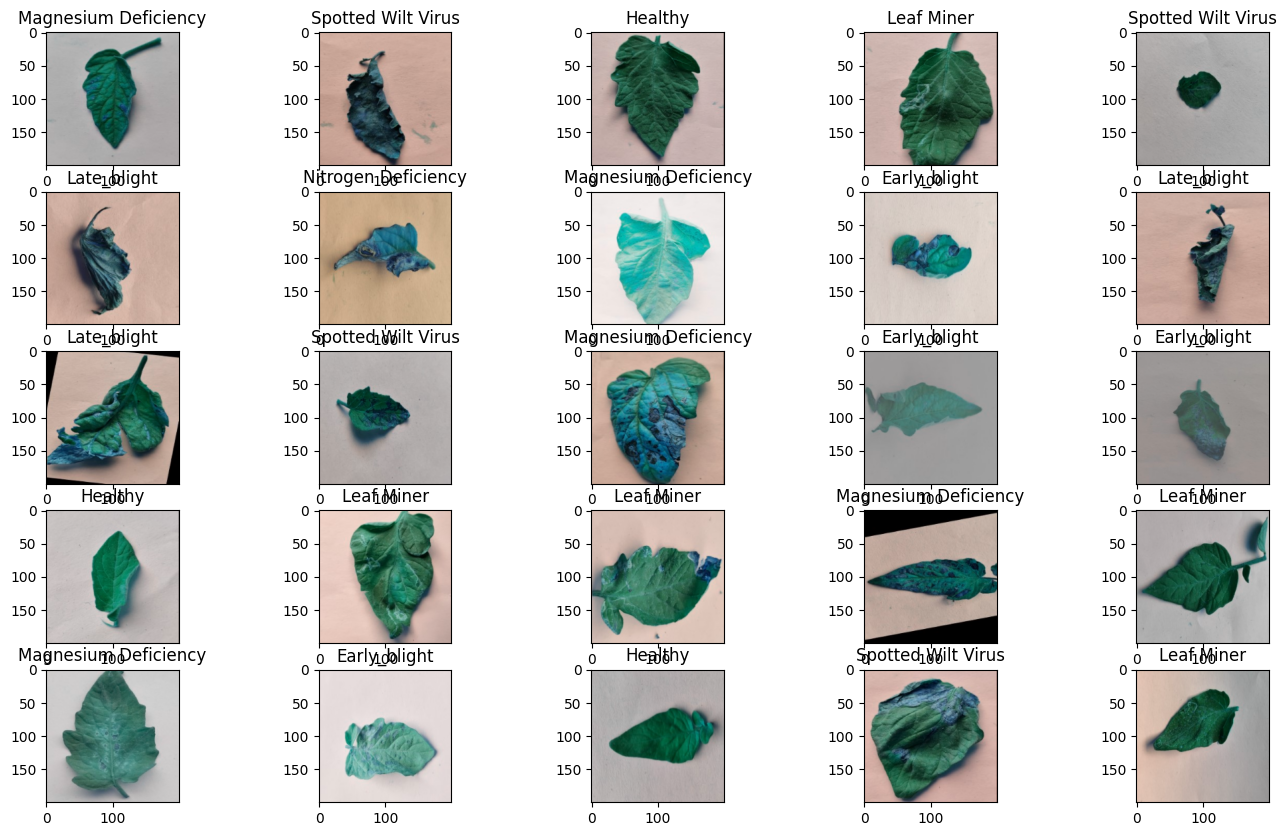

In [14]:
# Show Some Images
plt.figure(figsize=(17, 10))
for n, i in enumerate(list(np.random.randint(0, len(X_train), 25))):
    plt.subplot(5, 5, n+1)
    plt.imshow(X_train[i])
    plt.title(getlabel(y_train[i]))
plt.show() 

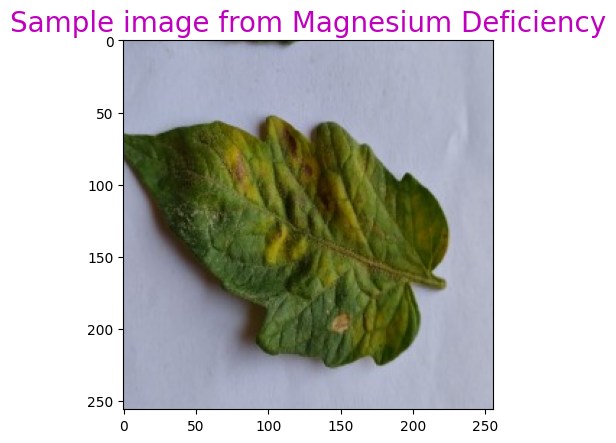

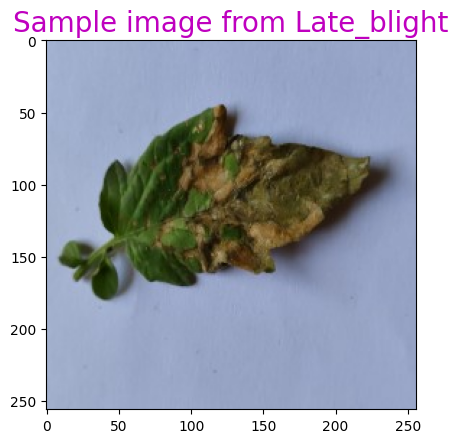

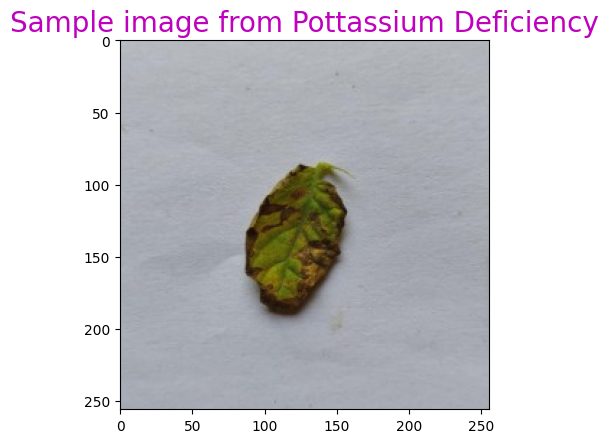

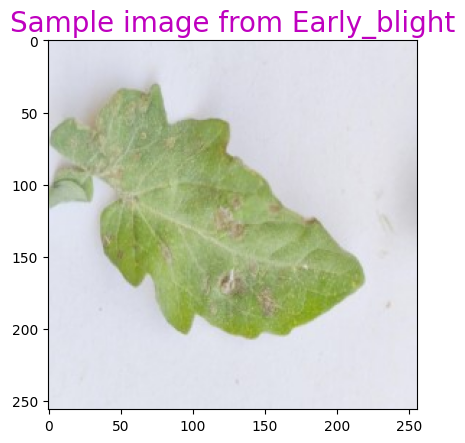

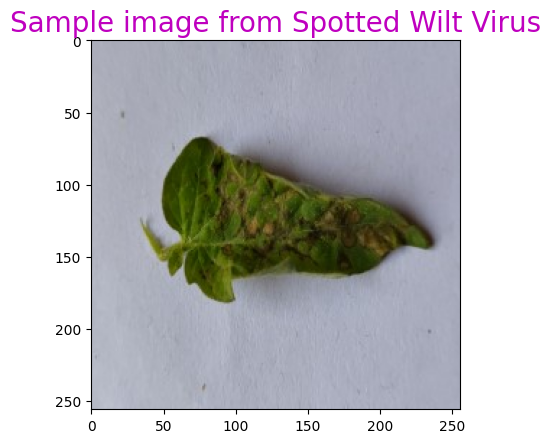

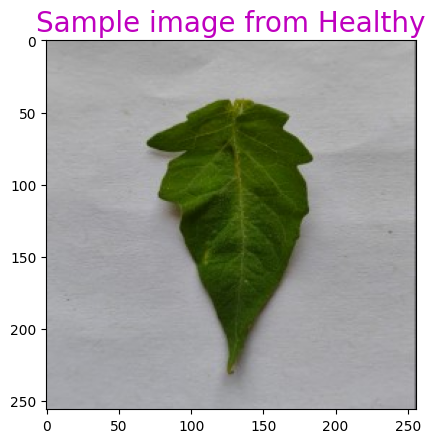

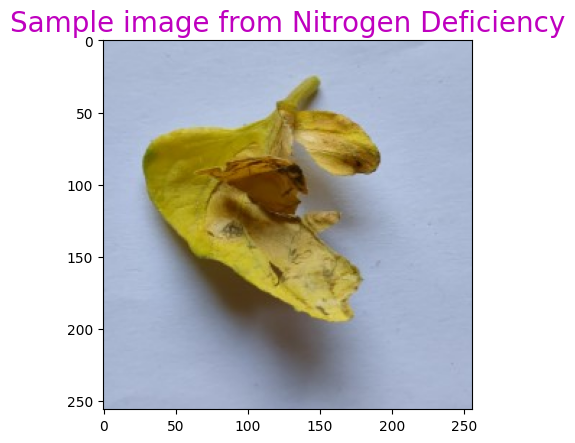

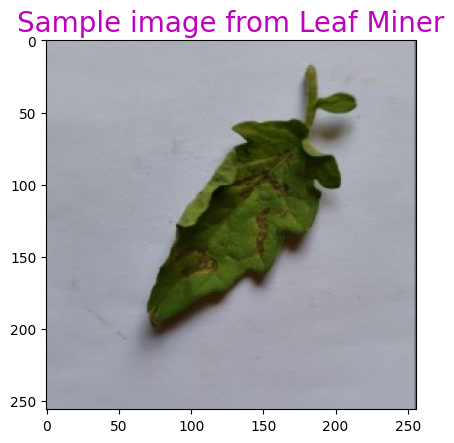

In [15]:
# Display image in all folder
for folder in os.listdir(train_file):
    folder_path = os.path.join(train_file, folder)
    files = os.listdir(folder_path)
    random_image = random.choice(files)
    img_path = os.path.join(folder_path, random_image)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"Sample image from {folder}" , fontsize=20 , color="m")
    plt.show()


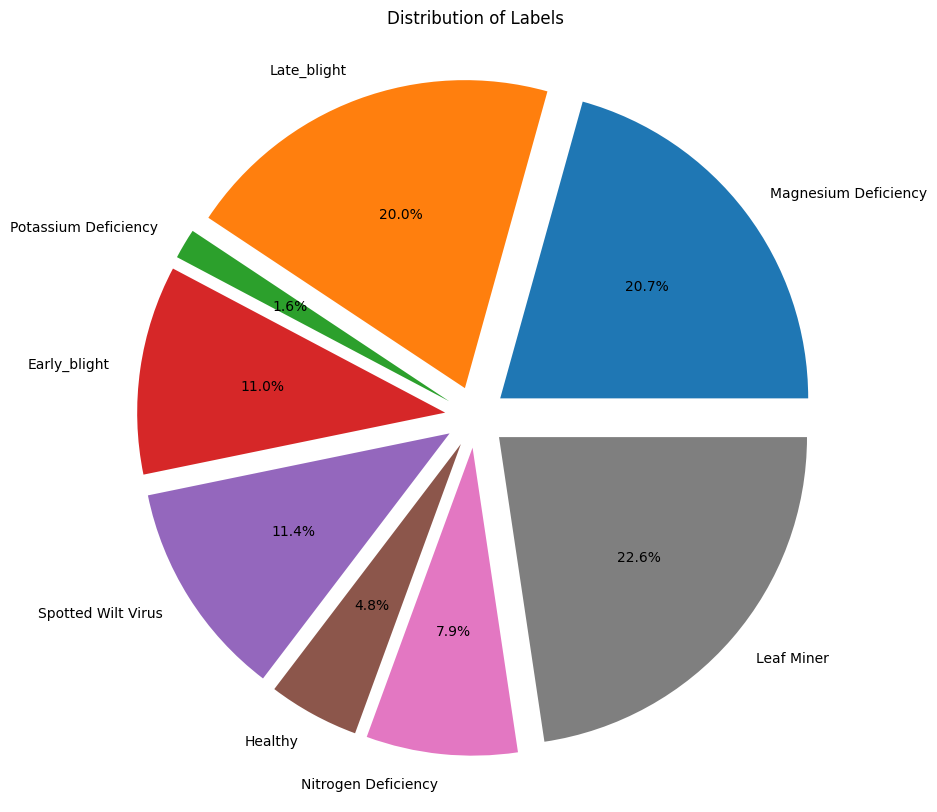

In [16]:
labels_pie = ("Magnesium Deficiency", "Late_blight", "Potassium Deficiency",
              "Early_blight", "Spotted Wilt Virus", "Healthy", 
              "Nitrogen Deficiency", "Leaf Miner")
count_labels = [654, 632, 50, 347, 361, 151, 251, 716]

plt.figure(figsize=(10, 10))
plt.pie(count_labels, labels=labels_pie, explode=[0.1]*len(labels_pie), autopct="%1.1f%%")
plt.title("Distribution of Labels")
plt.show()

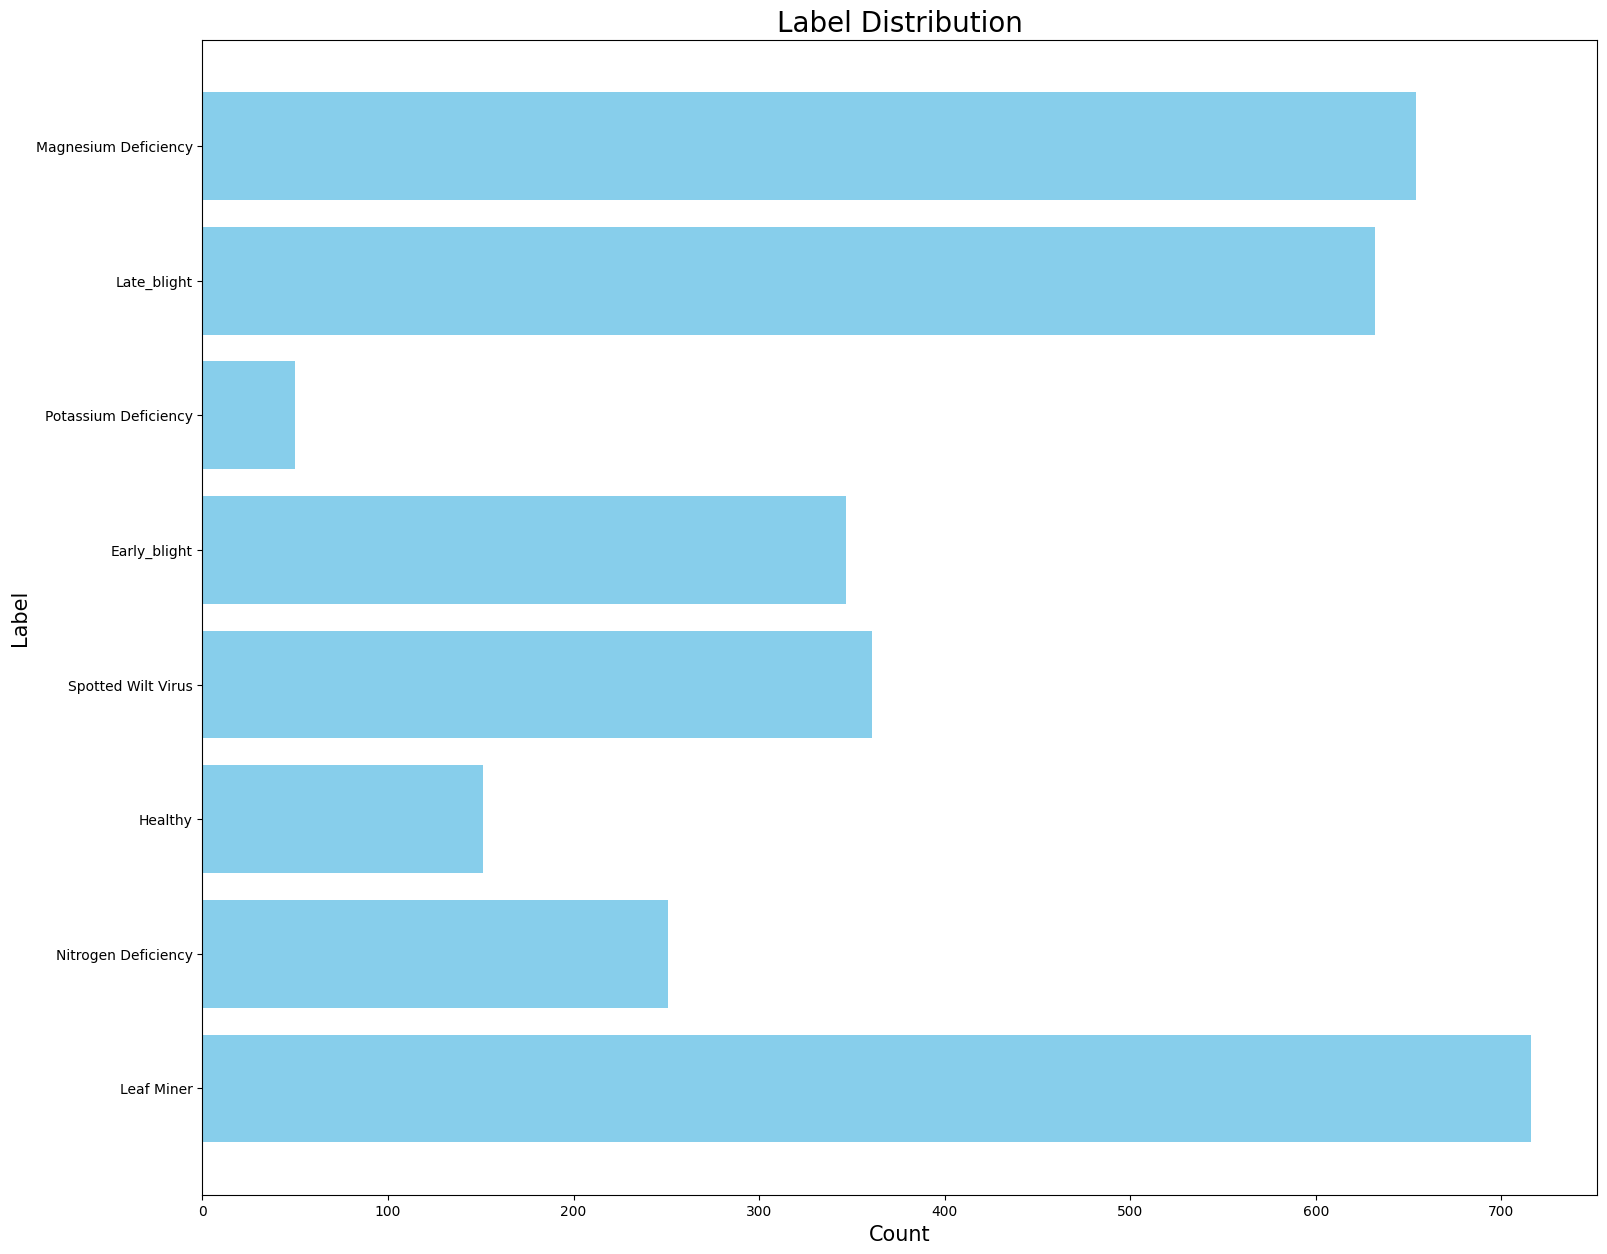

In [17]:
# Creating the bar plot
plt.figure(figsize=(18, 15))
plt.barh(labels_pie, count_labels, color='skyblue')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Label', fontsize=15)
plt.title('Label Distribution', fontsize=20)
plt.gca().invert_yaxis()  
plt.show()

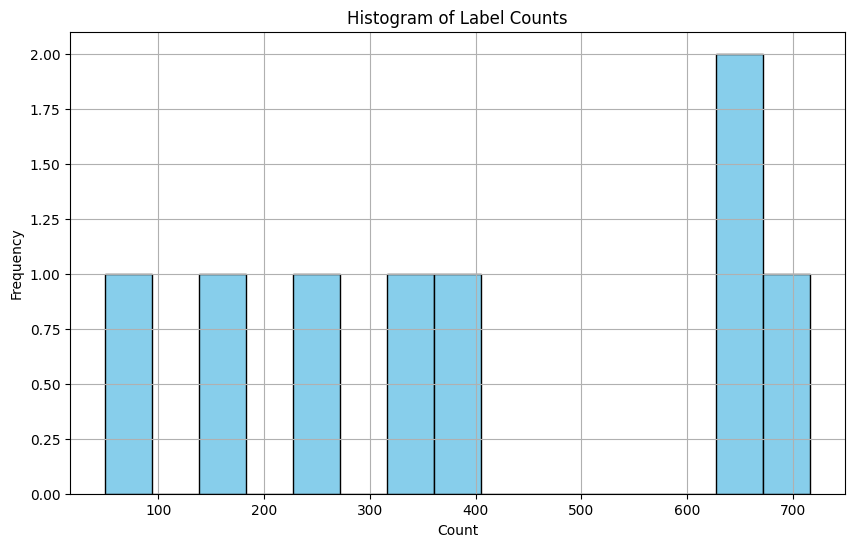

In [18]:

# Extract counts
counts = [654, 632, 50, 347, 361, 151, 251, 716]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Label Counts')
plt.grid(True)
plt.show()

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

In [21]:
input_shape = X_train[0].shape
num_classes = len(np.unique(y_train))
print("input_shape is == ",input_shape)
print("number of classes is == ",num_classes)

input_shape is ==  (200, 200, 3)
number of classes is ==  8


In [22]:
model = Sequential([
    Conv2D(filters=128 , kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",
                input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2) , strides=(2,2)),
    Conv2D(filters=64 , kernel_size=(3,3),strides=(1,1),activation="relu"),
    MaxPooling2D(pool_size=(2,2) , strides=(2,2)),
    Conv2D(filters=32 , kernel_size=(3,3),strides=(1,1),activation="relu"),
    MaxPooling2D(pool_size=(2,2) , strides=(2,2)),
    Conv2D(filters=64 , kernel_size=(3,3),strides=(1,1),activation="relu"),
    MaxPooling2D(pool_size=(2,2) , strides=(2,2)),
    Conv2D(filters=32 , kernel_size=(3,3),strides=(1,1),activation="relu"),
    MaxPooling2D(pool_size=(2,2) , strides=(2,2)),
    Conv2D(filters=64 , kernel_size=(3,3),strides=(1,1),activation="relu"),
    MaxPooling2D(pool_size=(2,2) , strides=(2,2)),
    
    
    Flatten(),
    Dense(128 , activation="relu"),
    Dropout(0.5),
    Dense(64 , activation="relu"),
    Dropout(0.5),
    Dense(32 , activation="relu"),
    Dense(16 , activation="relu"),
    Dense(num_classes , activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 200, 200, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                        

In [23]:
model.compile(optimizer="adam" , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
early = EarlyStopping(patience=15 , restore_best_weights=True, monitor='val_loss')

In [25]:
# Train the model
history = model.fit(X_train, y_train, epochs=100 , callbacks=[early],
                   validation_data=(X_valid, y_valid))

Epoch 1/100


I0000 00:00:1708199294.218256     826 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 [==============================] - 21s 149ms/step - loss: 1.9915 - accuracy: 0.2013 - val_loss: 2.0086 - val_accuracy: 0.2259
Epoch 2/100
80/80 [==============================] - 9s 109ms/step - loss: 1.8283 - accuracy: 0.3140 - val_loss: 1.9511 - val_accuracy: 0.3523
Epoch 3/100
80/80 [==============================] - 9s 109ms/step - loss: 1.6844 - accuracy: 0.3764 - val_loss: 1.8208 - val_accuracy: 0.3981
Epoch 4/100
80/80 [==============================] - 9s 110ms/step - loss: 1.6158 - accuracy: 0.4017 - val_loss: 1.8914 - val_accuracy: 0.3381
Epoch 5/100
80/80 [==============================] - 9s 110ms/step - loss: 1.6223 - accuracy: 0.4073 - val_loss: 1.7188 - val_accuracy: 0.3886
Epoch 6/100
80/80 [==============================] - 9s 110ms/step - loss: 1.5481 - accuracy: 0.4255 - val_loss: 1.6181 - val_accuracy: 0.4502
Epoch 7/100
80/80 [==============================] - 9s 110ms/step - loss: 1.5352 - accuracy: 0.4373 - val_loss: 1.5394 - val_accuracy: 0.4329
Epoch 8/10

In [26]:
loss , accuracy = model.evaluate(X_train , y_train)
print("Accuracy is === ",accuracy)
print("Loss is == ",loss)

80/80 [==============================] - 2s 29ms/step - loss: 0.8546 - accuracy: 0.6975
Accuracy is ===  0.6975088715553284
Loss is ==  0.8546118140220642


In [27]:
loss , accuracy = model.evaluate(X_test , y_test)
print("Accuracy is === ",accuracy)
print("Loss is == ",loss)

15/15 [==============================] - 1s 87ms/step - loss: 1.0237 - accuracy: 0.6161
Accuracy is ===  0.6160520315170288
Loss is ==  1.0237042903900146


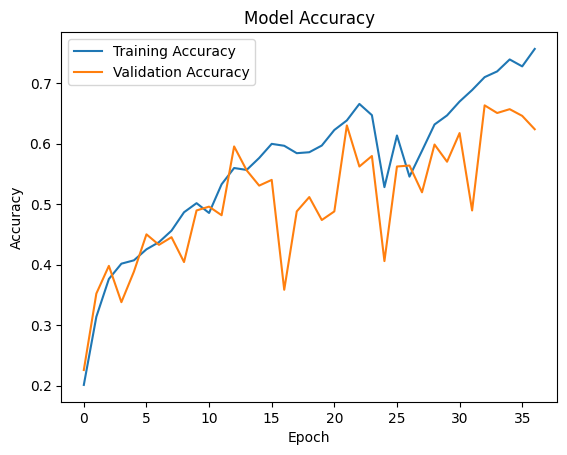

In [28]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

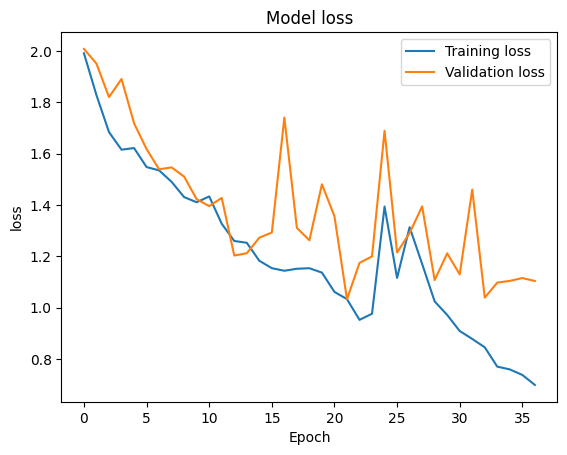

In [29]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [30]:
predictions = model.predict(X_test)
print("Predictions:", predictions[:5])
print("Actual Labels:", y_train[:5])

15/15 [==============================] - 1s 31ms/step
Predictions: [[3.0785945e-01 2.1153502e-01 4.5076709e-02 2.3060919e-01 1.1745191e-01
  2.4372400e-03 4.2515151e-02 4.2515326e-02]
 [9.0046501e-01 2.5618060e-03 1.0942764e-02 9.0794638e-03 9.8031564e-03
  1.5838475e-04 4.1792091e-02 2.5197385e-02]
 [7.3816979e-01 2.0555470e-02 4.2502157e-02 5.0275594e-02 3.1447198e-02
  1.3786986e-03 7.3483691e-02 4.2187363e-02]
 [9.4831783e-01 5.9489353e-04 5.3822882e-03 2.2405593e-03 2.8616651e-03
  1.3951516e-05 3.2585572e-02 8.0032824e-03]
 [6.7508298e-01 6.5210508e-05 5.1167060e-02 9.0244626e-05 1.9409577e-05
  1.4042359e-10 2.7357253e-01 2.5733098e-06]]
Actual Labels: [4 3 7 0 1]


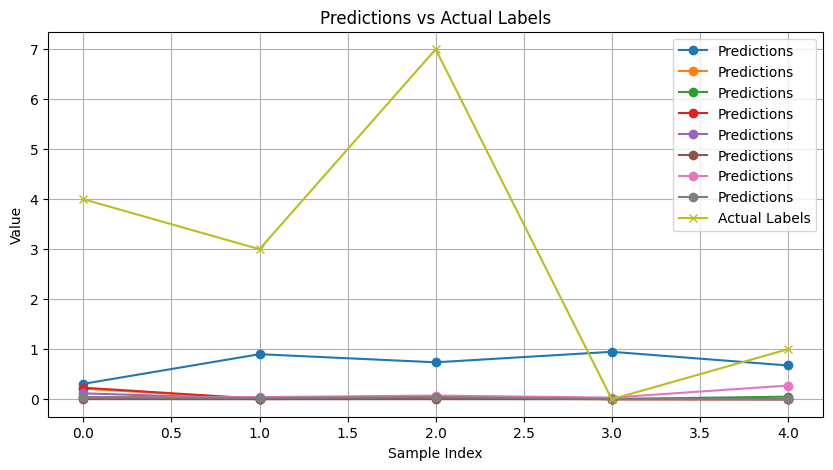

In [31]:
plt.figure(figsize=(10, 5))

plt.plot(predictions[:5], label='Predictions', marker='o')
plt.plot(y_train[:5], label='Actual Labels', marker='x')

plt.title('Predictions vs Actual Labels')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

15/15 [==============================] - 0s 31ms/step


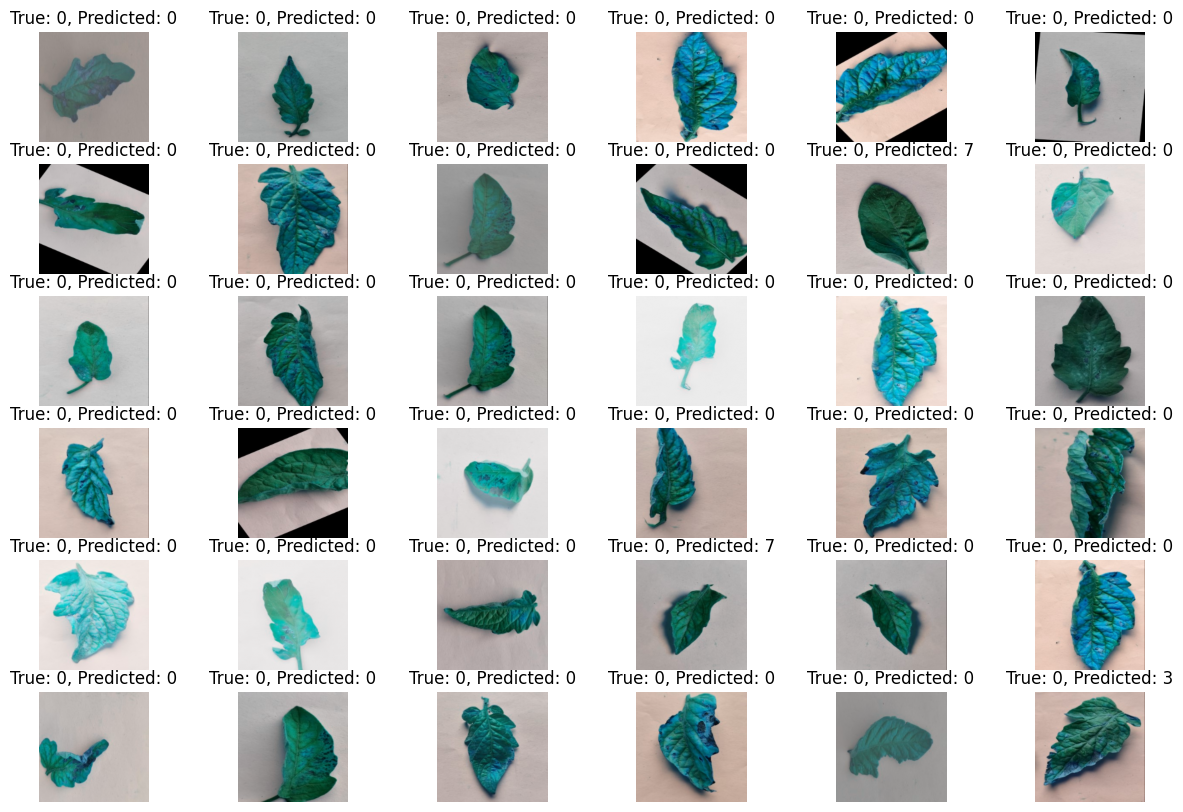

In [33]:
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# print(predicted_classes)

# Visualize the predictions
plt.figure(figsize=(15, 10))
for i in range(36): 
    plt.subplot(6, 6, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')
plt.show()

# END

# BY : SAYED ALI